Xinference can start the StableDiffusion model with ControlNet. MLSD ControlNet(_https://huggingface.co/lllyasviel/sd-controlnet-mlsd_) is good for finding straight lines and edges. This makes it particularly useful for architecture like room interiors and isometric buildings. This notebook shows how to use Xinference with StableDiffusion model and MLSD ControlNet.

# Preparation

First, you need to install Xinference with image support:
```shell
pip install xinference[image]
```


Then, start the Xinference server by the following command:
```shell
xinference
```

The Xinference server will be started:

```shell
2023-11-02 16:04:55,278 xinference   38878 INFO     Xinference successfully started. Endpoint: http://127.0.0.1:9997
2023-11-02 16:04:55,280 xinference.core.supervisor 38878 INFO     Worker 127.0.0.1:32187 has been added successfully
2023-11-02 16:04:55,281 xinference.deploy.worker 38878 INFO     Xinference worker successfully started.
```

# Start the StableDiffusion model with MLSD ControlNet

Now, we have an inference server running at `http://127.0.0.1:9997` with empty models. Let's launch the StableDifusion model.

In [1]:
from xinference.client import Client

client = Client("http://127.0.0.1:9997")

model_uid = client.launch_model(
    model_uid="my_controlnet",
    model_name="stable-diffusion-v1.5",
    model_type="image",
    controlnet="mlsd",
)
model = client.get_model(model_uid)

Use MLSDdetector to generate a straight line images from the input image.

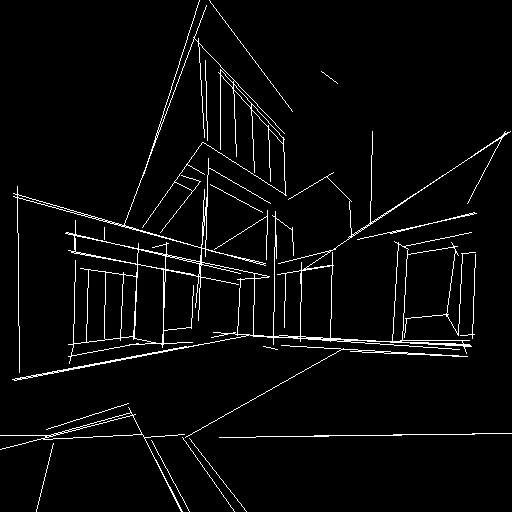

In [2]:
import os
from controlnet_aux import MLSDdetector
from diffusers.utils import load_image

mlsd = MLSDdetector.from_pretrained("lllyasviel/ControlNet")
image_path = os.path.expanduser("~/draft.png")
image = load_image(image_path)
image = mlsd(image)
image

Call the `image_to_image` API to the Xinference to get the result.

In [3]:
import io

prompt = (
    "a modern house, use glass window, best quality, 8K wallpaper,(realistic:1.3), "
    "photorealistic, photo realistic, hyperrealistic, orante, super detailed, "
    "intricate, dramatic, morning lighting, shadows, high dynamic range,wooden,blue sky"
)
negative_prompt = (
    "low quality, bad quality, sketches, signature, soft, blurry, drawing, "
    "sketch, poor quality, ugly, text, type, word, logo, pixelated, "
    "low resolution, saturated, high contrast, oversharpened"
)
bio = io.BytesIO()
image.save(bio, format="png")
result_image = model.image_to_image(
    image=bio.getvalue(),
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
)
result_image

{'created': 1698915298,
 'data': [{'url': '/Users/codingl2k1/.xinference/image/0dc3a20621044d22b27bbd5746e33bc7.jpg',
   'b64_json': None}]}

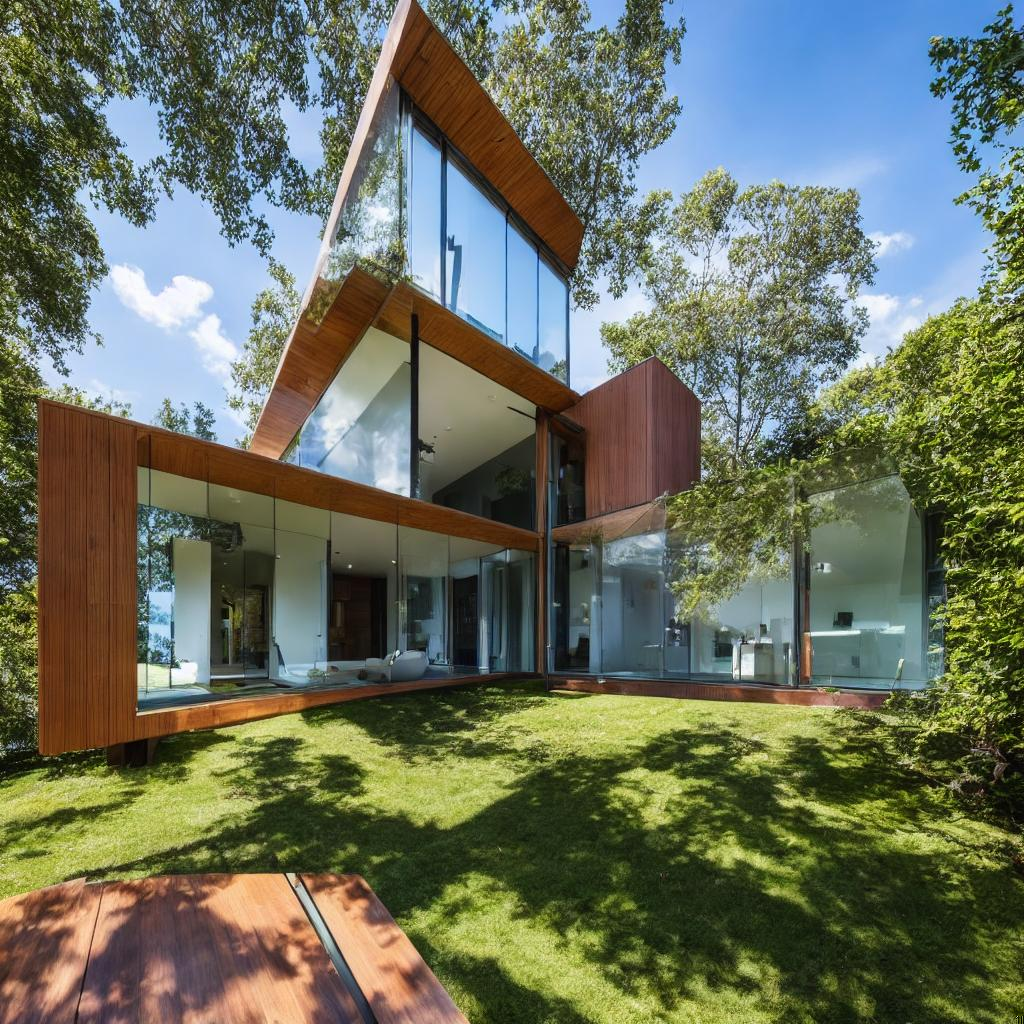

In [4]:
load_image("/Users/codingl2k1/.xinference/image/0dc3a20621044d22b27bbd5746e33bc7.jpg")

# Conclusion

ControlNet Stable Diffusion is a state-of-the-art technology that integrates AI image generation with the reliability of ControlNet. By leveraging ControlNet techniques, the Stable Diffusion model is able to generate high-quality, realistic images based on user input.

Xinference allows users to deploy models themselves and programmatically generate images in batches.